In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## loading the dataset

In [5]:
df=pd.read_csv('/kaggle/input/candy-data/candy-data.csv')
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [8]:
df=df.iloc[:,1:]
df.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [9]:
df.shape

(85, 12)

## calculating the correlations

In [10]:
correlation_matrix=df.corr()

<Axes: >

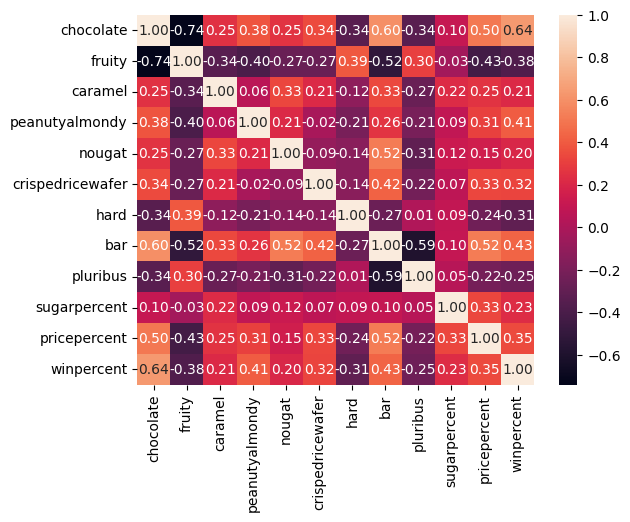

In [11]:
sns.heatmap(correlation_matrix,annot=True, fmt=".2f")

## importing the required model

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

## separating the data into independent variable x and independent variable y

In [13]:
x=df['sugarpercent'].values.reshape(-1,1)
y=df['pricepercent']

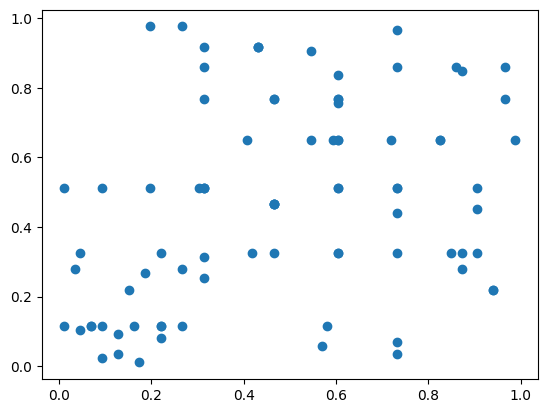

In [14]:
plt.scatter(x,y)

## splitting the data into 80% training data and 20% testing data

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

## creating and fitting the simple linear regression model

In [16]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

## model prediction and accuracy

In [17]:
y_pred=lr.predict(x_test)
print('mse',mean_squared_error(y_test,y_pred))
print('r2_score',r2_score(y_test,y_pred))

mse 0.05160211570294362
r2_score 0.2966096712799071


## scatterplot

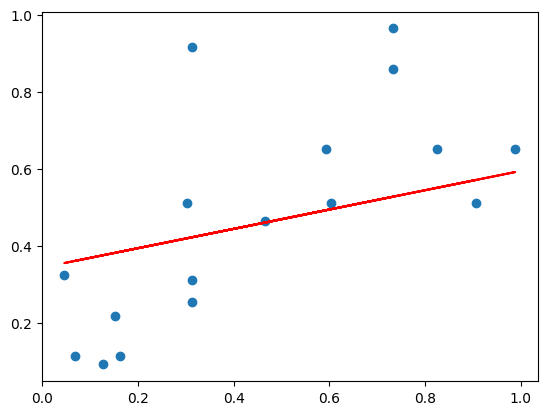

In [18]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred,color='red')

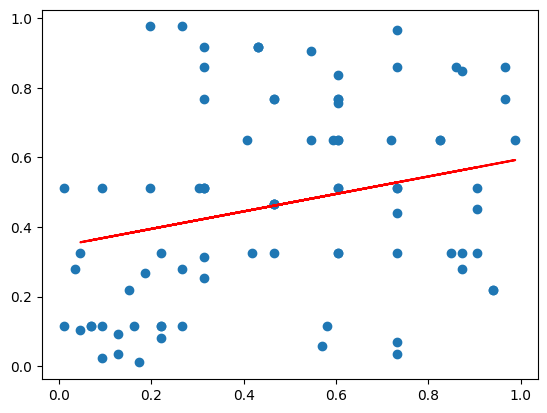

In [19]:
plt.scatter(x,y)
plt.plot(x_test,y_pred,color='red')

## using the gradient descent

In [21]:
def gradient_descent(x, y):
    m_curr = b_curr = 0
    iterations = 1000
    n = len(x)
    learning_rate = 0.001
    for i in range(iterations):
        # Calculate predicted value
        y_predicted = m_curr * x + b_curr
        # # Calculate slope for m and b
        m_derivative = -2/n*sum(x * (y - y_predicted))
        b_derivative = -2/n*sum(y - y_predicted)
        # Update new value for m and b
        m_curr = m_curr - learning_rate * m_derivative
        b_curr = b_curr - learning_rate * b_derivative
        # calculate cost
        cost = (1/2) * sum([val ** 2 for val in (y - y_predicted)])
        #print("m {}, b {}, iteration {}, cost {}".format(m_curr, b_curr, i, cost ))
        if i%100==0:
            plt.scatter(x,y)
            plt.plot(x,y_predicted)
    return m_curr,b_curr

## calculating the slope and intercept value

0.1948613253007112 0.3404232351649829


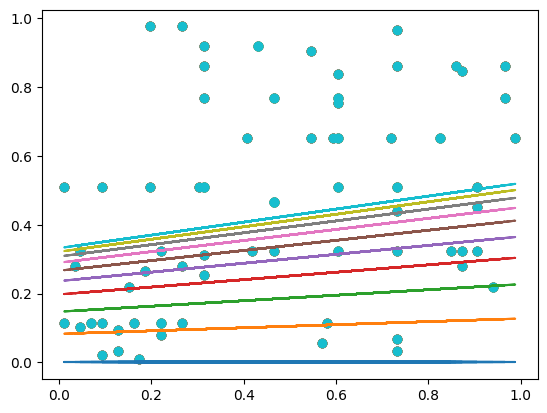

In [22]:
x=df['sugarpercent']
y=df['pricepercent']
m,b=gradient_descent(x, y)
print(m,b)

## scatterplot

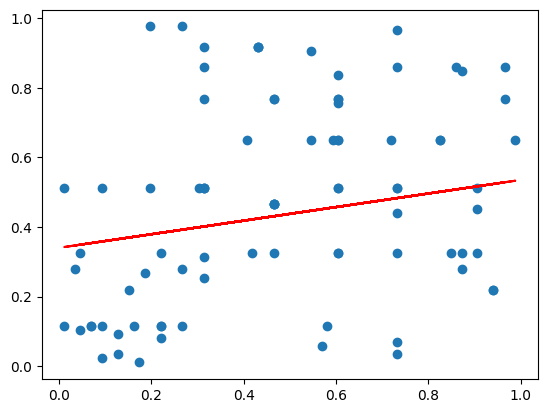

In [23]:
x=df['sugarpercent']
y=df['pricepercent']
line=m*x+b
plt.scatter(x,y)
plt.plot(x,line,color='red')

## accuracy

In [24]:
print('mse',mean_squared_error(y,line))
print('r2_score',r2_score(y,line))

mse 0.07466514418103605
r2_score 0.07462742609845041
